<a href="https://colab.research.google.com/github/jamg-upv/Impacto-citas-articulo/blob/main/impactoencitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

How to cite this work:



------------
Referencias: 
Documento compartidoen drive

Miro: https://miro.com/app/board/uXjVOVj0st4=/?moveToWidget=3458764518530820364&cot=14

Este codigo permite integrar una tabla con los datos de un conjunto de articulos y sus numeros de citas, normalizarlas teniendo en cuenta las tablas de citas mundiales (scopus) o baseline de (WOS), y añadir las métricas de impacto de la revista en el año de publicación del articulo.
Son necesarias 3 tablas para cada proveedor (scopus y WOS)


Fuente de datos SCOPUS https://elsevier.com/?a=734751


Tareas 
1. Lista de 25 DOIs Banco de Pruebas1  (meritos (5 autores "al azar") )
2. Descargar como cvs bancopruebas1sco tabla Scopus  de 25 meritos (5 autores "al azar") a partir de los DOI
1. Descargar como cvs bancopruebas1wos tabla WOS de los 25 meritos a partir de los DOI
1. preparar un prototipo de la tabla que penamos crear para consultar a compañeros del equipo
2.   



Pasos previos. Librerias y configuración

In [1]:
# Importamos ls librería de Python que necesitaremos en este notebook

import pandas as pd  # Pandas permite manipular tablas 
import matplotlib.pyplot as plt  # Para hacer gráficas
import seaborn as sns  # Para hacer gráficas pero necesita matplotlib y deja unos graficos chulisismos 
sns.set_style('whitegrid')  # Pone una malla de fondo bastante mona para Seaborn
import numpy as np

import os #rename files
#import xlwings as xw #permite leer docuemtnos xlb me da error y no lo puedo instalar

# Redondeamos las salidas a dos decimales
%precision %.2f

# from google.colab import drive
# drive.mount('/content/drive')



'%.2f'

Carga de *datos* Indicadores de revistas SCOPUS

In [ ]:
#DEPRICATED
# si lo descargamos directo de la web Ç(ventaja es que con una descarga siempre está accesible y no hay que volver a descargarlo durante la sesión)
# el archivo de SCopus de 10 años ocupa demasiados GB (60gb) y no se puede alojar en drive (no debería esar en un acceso libre en github porque es propiedad de Scopus)
   #!wget https://elsevier.com/?a=734751 
#es XLB, hay que convertirlo a mano XLS porque xlb requiere de librerias que no tengo instaladas en colab
# y hacerlo accesible aquí
#la primer pesaña son definiciones de indicadores, la segunda el el año más reciente y luego 9 mas con los anteriores. La ultima pestaña es un clasificación de categorias
## depricated_Puedo limpiar a mano las pestañas no usadas (priemera y ultima) y dejo solo los 7 años más recientes (para que sean solo 44mb y me quepa en google drive)--> pero no sirve porque luego no lee bien porque googledrive CONVIERTE a formato propio



In [ ]:
# abro el xlb a mano y lo convierto en Excel, Aprovecho para Preparacion de las pestañas d la excel quitando espacioes en los rotulos del encabezado Estandarizar los nombres de las columnas

# ScopusSourceID Title CitationCount ScholarlyOutput PercentCited CiteScore SNIP SJR ScopusASJCCode 
# ScopusSubSubjectArea Percentile RANK RankOutOf Publisher Type OpenAccess Quartile Top10 
# URLScopusSourceID PrintISSN ElectISSN

# Subo a Alfresco (que permite leerlo como un xls)

## No usado 

In [ ]:
#métricas de revistas Scopus

# descarga de alfresco con el nombre de fichero que quiera guardarlo
!wget --output-document=CiteScore14_20.xlsx https://gdocu.upv.es/share/proxy/alfresco-noauth/api/internal/shared/node/content/egXj6G-GT0WY_g3O-2_swA
#si lo hago manual, que tarda varios minutos en subir cada vez) con Wget en pocos segundos está cargado en el entonrno

# en general funciona mejor con archivos csv, que con excel. tendre que partir el archivo excel en csv

#renbombrar el fichero local descargado para que no sea tan feote
#os.rename(r'/content/edit?usp=sharing',r'/content/scopus.xlsx')

--2022-02-10 17:37:12--  https://gdocu.upv.es/share/proxy/alfresco-noauth/api/internal/shared/node/content/egXj6G-GT0WY_g3O-2_swA
Resolving gdocu.upv.es (gdocu.upv.es)... 158.42.4.31
Connecting to gdocu.upv.es (gdocu.upv.es)|158.42.4.31|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 62207801 (59M) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘CiteScore14_20.xlsx’

CiteScore14_20.xlsx 100%[===================>]  59.33M  6.44MB/s    in 15s     

2022-02-10 17:37:27 (4.07 MB/s) - ‘CiteScore14_20.xlsx’ saved [62207801/62207801]



In [ ]:
# unos 150seg en cargar el dataframe)
# me sirve para comprobar el tamaño de filas en cada conjunto de años con los que tengo en el CVS (o puedo directamente trabajar con este dataframe)

dfs = pd.read_excel('/content/CiteScore14_20.xlsx',engine='openpyxl',sheet_name=None)
dfs

In [ ]:
# Otra forma de hacer exactamente lo mismo de arriba (130 segundo) (puede llegar a 180seg)
# creo un objeto tipo DICT

xl_file = pd.ExcelFile('/content/CiteScore14_20.xlsx')

dfs2 = {sheet_name: xl_file.parse(sheet_name) 
          for sheet_name in xl_file.sheet_names}
dfs2

In [ ]:
##pendiente automtizar la creación de un CSV a partir de las pestañas, añadiendo una columna del año (y rotulando citescore solo sin años en las columnas de datos)

# Usado
Preparacion de las pestañas d la excel
Quitar espacioes en los rotulos del encabezado
Estandarizar los nombres de las columnas

ScopusSourceID	Title	CitationCount	ScholarlyOutput	PercentCited	CiteScore	SNIP	SJR	ScopusASJCCode	ScopusSubSubjectArea	Percentile	RANK	RankOutOf	Publisher	Type	OpenAccess	Quartile	Top10	URLScopusSourceID	PrintISSN	ElectISSN


In [ ]:
# importar tablas de metricas revisas SCOPUS (la excel original la he convertido en un CVS por cada pestaña)
# hay que importar los csv y ñadir a cada uno un campo con el año y luego fusionarlos en una tabla unica o trabajarlos como tablas separadas (no sé que será más eficiente)
# El csv subido a Github no funciona (crea tags de html en el archivo y no se lee luego con pandas. Lo lee pero los nombres de los ficheros no son intuitivos)
# !wget https://github.com/jamg-upv/Impacto-citas-articulo/blob/main/tablasinput/CiteScore2020.csv


--2022-02-08 20:00:51--  https://github.com/jamg-upv/Impacto-citas-articulo/blob/main/tablasinput/CiteScore2020.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘CiteScore2020.csv’

CiteScore2020.csv       [ <=>                ] 169.11K  --.-KB/s    in 0.04s   

2022-02-08 20:00:51 (4.28 MB/s) - ‘CiteScore2020.csv’ saved [173167]



In [2]:
#lecturas en orden inverso de 2020 hasta 2011
!wget --output-document=CS2020.cvs  https://gdocu.upv.es/share/proxy/alfresco-noauth/api/internal/shared/node/content/bCd_63LrSVSkf96qwXihVQ  #2020
!wget --output-document=CS2019.cvs  https://gdocu.upv.es/share/proxy/alfresco-noauth/api/internal/shared/node/content/5XemCCZCS-WNmJ-byA6uzA #2019
!wget --output-document=CS2018.cvs  https://gdocu.upv.es/share/proxy/alfresco-noauth/api/internal/shared/node/content/H3ZrGBF1TNuBDCI95AVHkA #2018
!wget --output-document=CS2017.cvs  https://gdocu.upv.es/share/proxy/alfresco-noauth/api/internal/shared/node/content/kTZ3Mlj8Qr6DC08kauJ2og #2017
!wget --output-document=CS2016.cvs  https://gdocu.upv.es/share/proxy/alfresco-noauth/api/internal/shared/node/content/N3l6wTevTLeD6fgI42Hlvw #2016
!wget --output-document=CS2015.cvs  https://gdocu.upv.es/share/proxy/alfresco-noauth/api/internal/shared/node/content/oYOpp1OcTIKXBzXfsDuf2g  #2015
!wget --output-document=CS2014.cvs  https://gdocu.upv.es/share/proxy/alfresco-noauth/api/internal/shared/node/content/FMHpXVs4SXygTdZGYVp1kA #2014
!wget --output-document=CS2013.cvs  https://gdocu.upv.es/share/proxy/alfresco-noauth/api/internal/shared/node/content/XOSnXVhMSFG3lC3hg8bHmg #2013
!wget --output-document=CS2012.cvs  https://gdocu.upv.es/share/proxy/alfresco-noauth/api/internal/shared/node/content/IE_0VEppTFOxR2MEwMy9Nw #2012
!wget --output-document=CS2011.cvs  https://gdocu.upv.es/share/proxy/alfresco-noauth/api/internal/shared/node/content/Q_O9A4pMTmaXZmxdEaMmSw #2011

--2022-02-12 19:20:44--  https://gdocu.upv.es/share/proxy/alfresco-noauth/api/internal/shared/node/content/bCd_63LrSVSkf96qwXihVQ
Resolving gdocu.upv.es (gdocu.upv.es)... 158.42.4.31
Connecting to gdocu.upv.es (gdocu.upv.es)|158.42.4.31|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 11980999 (11M) [text/csv]
Saving to: ‘CS2020.cvs’

CS2020.cvs          100%[===================>]  11.43M  9.34MB/s    in 1.2s    

2022-02-12 19:20:46 (9.34 MB/s) - ‘CS2020.cvs’ saved [11980999/11980999]

--2022-02-12 19:20:46--  https://gdocu.upv.es/share/proxy/alfresco-noauth/api/internal/shared/node/content/5XemCCZCS-WNmJ-byA6uzA
Resolving gdocu.upv.es (gdocu.upv.es)... 158.42.4.31
Connecting to gdocu.upv.es (gdocu.upv.es)|158.42.4.31|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 11514712 (11M) [text/csv]
Saving to: ‘CS2019.cvs’

CS2019.cvs          100%[===================>]  10.98M  8.98MB/s    in 1.2s    

2022-02-12 19:20:47 (8.98 MB/s) - ‘CS2019.cv

In [4]:
CS2020= pd.read_csv('CS2020.cvs',sep=';')
CS2019= pd.read_csv('CS2019.cvs',sep=';')
CS2018= pd.read_csv('CS2018.cvs',sep=';')
CS2017= pd.read_csv('CS2017.cvs',sep=';')
CS2016= pd.read_csv('CS2016.cvs',sep=';')
CS2015= pd.read_csv('CS2015.cvs',sep=';')
CS2014= pd.read_csv('CS2014.cvs',sep=';')
CS2013= pd.read_csv('CS2013.cvs',sep=';')
CS2012= pd.read_csv('CS2012.cvs',sep=';')
CS2011= pd.read_csv('CS2011.cvs',sep=';')
#puedo empaquetar los diferentes dataframes juntos para hacer referencia a ellos con un índice
ListOfYearCS=[CS2020,CS2019,CS2018,CS2017,CS2016,CS2015,CS2014,CS2013,CS2012,CS2011]
#algun error hay porque no coge todas las filas ListOfYearCS[1] Es ditinto de CS2020 (tiene 57k filaas en lugar de 59k) en 2019 coincide pero en 2018 no...

In [ ]:
ListOfYearCS[1]

,ScopusSourceID,Title,CitationCount,ScholarlyOutput,PercentCited,CiteScore,SNIP,SJR,ScopusASJCCode,ScopusSubSubjectArea,Percentile,RANK,RankOutOf,Publisher,Type,OpenAccess,Quartile,Top10,URLScopusSourceID,PrintISSN,ElectISSN
0,12128,Behavioural and Cognitive Psychotherapy,652,226,"70,8","2,9","0,981","0,805",3203.0,Clinical Psychology,68.0,88.0,275.0,Cambridge University Press,j,NO,2.0,FALSO,https://www.scopus.com/sourceid/12128,13524658,14691833
1,12366,Photogrammetric Engineering and Remote Sensing,644,260,"60,8","2,5","0,708","0,521",1903.0,Computers in Earth Sciences,48.0,21.0,40.0,American Society for Photogrammetry and Remote...,j,NO,3.0,FALSO,https://www.scopus.com/sourceid/12366,991112,NaN
2,12894,Chinese Journal of Chromatography (Se Pu),649,731,"44,5","0,9","0,282","0,199",1500.0,General Chemical Engineering,29.0,200.0,281.0,Zhongguo Kexueyan Ganguang Huaxue Yanjiusuo,j,NO,3.0,FALSO,https://www.scopus.com/sourceid/12894,10008713,18722059
3,12894,Chinese Journal of Chromatography (Se Pu),649,731,"44,5","0,9","0,282","0,199",1603.0,Electrochemistry,17.0,31.0,37.0,Zhongguo Kexueyan Ganguang Huaxue Yanjiusuo,j,NO,4.0,FALSO,https://www.scopus.com/sourceid/12894,10008713,18722059
4,12894,Chinese Journal of Chromatography (Se Pu),649,731,"44,5","0,9","0,282","0,199",1602.0,Analytical Chemistry,15.0,101.0,119.0,Zhongguo Kexueyan Ganguang Huaxue Yanjiusuo,j,NO,4.0,FALSO,https://www.scopus.com/sourceid/12894,10008713,18722059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57013,21100925891,Journal of Early Modern Studies,0,7,0,0,NaN,NaN,3310.0,Linguistics and Language,3.0,820.0,884.0,Firenze University Press,j,NO,4.0,FALSO,https://www.scopus.com/sourceid/21100925891,22797149,NaN
57014,21100925891,Journal of Early Modern Studies,0,7,0,0,NaN,NaN,1208.0,Literature and Literary Theory,5.0,727.0,823.0,Firenze University Press,j,NO,4.0,FALSO,https://www.scopus.com/sourceid/21100925891,22797149,NaN
57015,21100925891,Journal of Early Modern Studies,0,7,0,0,NaN,NaN,1202.0,History,4.0,1158.0,1259.0,Firenze University Press,j,NO,4.0,FALSO,https://www.scopus.com/sourceid/21100925891,22797149,NaN
57016,21100937999,Australian Journal of Cancer Nursing,1,7,"14,3","0,1",NaN,NaN,2917.0,Oncology (nursing),2.0,17.0,17.0,Cambridge Media,j,NO,4.0,FALSO,https://www.scopus.com/sourceid/21100937999,14412551,NaN


In [ ]:
CS2020

In [ ]:
CS2019

In [ ]:
CS2018

In [ ]:
CS2017

In [ ]:
CS2016

In [ ]:
CS2015

In [ ]:
CS2014

In [ ]:
CS2013

In [ ]:
CS2012

In [ ]:
CS2011

Para cada año dejar solo la fila donde una revista tenga el mejor CS (igual no es la fila con el mejor percentil de SJR pero como no tengo percentilizado el SJR no me afecta (puedo "percentilizarlo" con las revistas incluidas en las solicitudes de años anteriores

#prueba con 1 año

(array([8590., 8138., 5106., 2531., 1423.]),
 array([1, 2, 3, 4, 5, 6]),
 <a list of 5 Patch objects>)

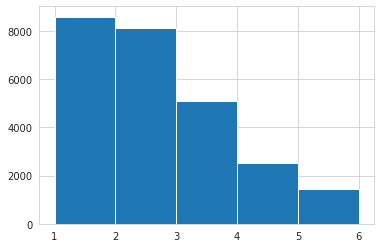

In [ ]:
#para cada año 
# df=ListOfYearCS[3]
df=CS2020
# Tabla con todos los ISSN Repetidos en un año (o ScopusSourceID sería más robusto o más rápido porque no tengo que ver en qué columna mirar) contar>1
#crear una columna para el count

# as index false es vital para que no cree una serie sino un dataframe donde pueda apuntar a las variables https://realpython.com/pandas-groupby/
ContarSourceId=df.groupby(['ScopusSourceID'], as_index=False).size()
ContarSourceId


plt.hist(ContarSourceId ["size"], bins=[1,2,3,4,5,6])
# plt.hist(ContarSourceId2 ["size"], bins=6)

In [ ]:
# # Para convertir el indice de una tabla en una columna de un df
# s.index.name = 'Date'
# s.reset_index()

# # Pero no lo necesito porque uso "as index false" para que no cree una serie sino un dataframe donde pueda apuntar a las variables https://realpython.com/pandas-groupby/
# total=filtered_dates.groupby(['provincia_iso'], as_index=False).agg(sum)


In [ ]:
# en lugar de mostrar solo las filas cuyo count sea mayor que 1 y  buscar las filas con el ScopusSourceID	 >1  y borrar las filas de menos Percentile
# aprovecho la función keep="last" para  eliminar todas las filas con un valor repetido, menos la ultima
# Establecemos keep=False para eliminar todas las filas que tengan el mismo valor de cualquier columna.

#primero tengo que ordenar por ScopusSourceID  y por Percentile ascendente
dfOrdered=df.sort_values(['ScopusSourceID', 'Percentile'], ascending=True)
dfOrderedNoDup = dfOrdered.drop_duplicates(subset=['ScopusSourceID'], keep="last")


(array([25990.,     0.,     0.,     0.,     0.]),
 array([1, 2, 3, 4, 5, 6]),
 <a list of 5 Patch objects>)

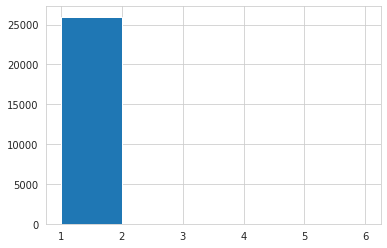

In [ ]:
# compruebo que ahora no hay ScopusSourceID repetidos
ContarSourceIdNoDup = dfOrderedNoDup.groupby("ScopusSourceID", as_index=False).size()
plt.hist(ContarSourceIdNoDup ["size"], bins=[1,2,3,4,5,6])
# plt.hist(ContarSourceId2 ["size"], bins=6)

In [ ]:
#compruebo que me he quedado la fila con mejor percentil
print ("DataFrame with duplicates:"), print (ContarSourceId, "\n") 
print ("DataFrame without duplicates:"), print (ContarSourceIdNoDup, "\n")

dfOrdered.groupby("ScopusSourceID", as_index=False).mean()



DataFrame with duplicates:
       ScopusSourceID  size
0               12001     2
1               12002     2
2               12004     2
3               12005     2
4               12006     4
...               ...   ...
25985     21101041510     3
25986     21101041511     4
25987     21101041512     4
25988     21101041552     2
25989     21101041622     1

[25990 rows x 2 columns] 

DataFrame without duplicates:
       ScopusSourceID  size
0               12001     1
1               12002     1
2               12004     1
3               12005     1
4               12006     1
...               ...   ...
25985     21101041510     1
25986     21101041511     1
25987     21101041512     1
25988     21101041552     1
25989     21101041622     1

[25990 rows x 2 columns] 



,ScopusSourceID,CitationCount,ScholarlyOutput,PercentCited,ScopusASJCCode,Percentile,RANK,RankOutOf,Quartile
0,12001,774.0,247.0,74.0,3003.50,44.000000,59.00,113.000000,2.5
1,12002,58.0,63.0,43.0,2201.50,58.500000,110.00,690.500000,2.0
2,12004,517.0,151.0,73.0,2970.50,66.500000,134.50,392.500000,2.0
3,12005,1456.0,379.0,70.0,2970.50,70.500000,119.00,392.500000,1.5
4,12006,3253.0,385.0,87.0,2808.00,95.000000,11.75,449.500000,1.0
...,...,...,...,...,...,...,...,...,...
25985,21101041510,37.0,62.0,34.0,3049.00,15.666667,232.00,281.666667,4.0
25986,21101041511,29.0,88.0,27.0,2856.25,23.250000,18.25,24.250000,3.5
25987,21101041512,1.0,8.0,13.0,2721.00,6.000000,144.00,153.000000,4.0
25988,21101041552,779.0,245.0,80.0,2827.00,79.000000,46.00,159.000000,1.5


In [ ]:
dfOrderedNoDup.groupby("ScopusSourceID", as_index=False).mean()

,ScopusSourceID,CitationCount,ScholarlyOutput,PercentCited,ScopusASJCCode,Percentile,RANK,RankOutOf,Quartile
0,12001,774.0,247.0,74.0,3205.0,55.0,66.0,148.0,2.0
1,12002,58.0,63.0,43.0,1202.0,86.0,183.0,1328.0,1.0
2,12004,517.0,151.0,73.0,3203.0,71.0,81.0,283.0,2.0
3,12005,1456.0,379.0,70.0,3203.0,75.0,70.0,283.0,1.0
4,12006,3253.0,385.0,87.0,3304.0,98.0,17.0,1319.0,1.0
...,...,...,...,...,...,...,...,...,...
25985,21101041510,37.0,62.0,34.0,3203.0,21.0,224.0,283.0,4.0
25986,21101041511,29.0,88.0,27.0,2913.0,32.0,18.0,26.0,3.0
25987,21101041512,1.0,8.0,13.0,2715.0,12.0,120.0,136.0,4.0
25988,21101041552,779.0,245.0,80.0,2919.0,89.0,3.0,24.0,1.0


#Modelo con todos los años

In [ ]:
# replicar para todos los demás años

#pendiente MEJORA construir df con un bucle for i=2011 to 2020

In [6]:
#mientras tengo un bucle lo hago manualemente
# Construir una tabla uniendo las filas de todos los años (Creando una columna de año CsYear)
df1=CS2020
df1['CsYear'] =2020

df2=CS2019
df2['CsYear'] =2019
df=df1.append(df2)

df3=CS2018
df3['CsYear'] =2018
df=df.append(df3)

df4=CS2017
df4['CsYear'] =2017
df=df.append(df4)

df5=CS2016
df5['CsYear'] =2016
df=df.append(df5)

df6=CS2015
df6['CsYear'] =2015
df=df.append(df6)

df7=CS2014
df7['CsYear'] =2014
df=df.append(df7)

df8=CS2013
df8['CsYear'] =2013
df=df.append(df8)

df9=CS2012
df9['CsYear'] =2012
df=df.append(df9)

df10=CS2011
df10['CsYear'] =2011
df=df.append(df10)



df




,ScopusSourceID,Title,CitationCount,ScholarlyOutput,PercentCited,CiteScore,SNIP,SJR,ScopusASJCCode,ScopusSubSubjectArea,Percentile,RANK,RankOutOf,Publisher,Type,OpenAccess,Quartile,Top10,URLScopusSourceID,PrintISSN,ElectISSN,CsYear
0,21101021140,1700-tal: Nordic Journal for Eighteenth-Centur...,0,5,0,0,0,0,1213.0,Visual Arts and Performing Arts,6.0,466.0,532.0,Swedish Society for Eighteenth-Century Studies,j,YES,4.0,FALSO,https://www.scopus.com/sourceid/21101021140,NaN,NaN,2020
1,21101021140,1700-tal: Nordic Journal for Eighteenth-Centur...,0,5,0,0,0,0,1202.0,History,3.0,1235.0,1328.0,Swedish Society for Eighteenth-Century Studies,j,YES,4.0,FALSO,https://www.scopus.com/sourceid/21101021140,NaN,NaN,2020
2,21101021140,1700-tal: Nordic Journal for Eighteenth-Centur...,0,5,0,0,0,0,3316.0,Cultural Studies,2.0,986.0,1037.0,Swedish Society for Eighteenth-Century Studies,j,YES,4.0,FALSO,https://www.scopus.com/sourceid/21101021140,NaN,NaN,2020
3,21100404576,2D Materials,12778,920,90,"13,9","1,402","2,702",2210.0,Mechanical Engineering,97.0,14.0,596.0,Institute of Physics Publishing,j,NO,1.0,VERDADERO,https://www.scopus.com/sourceid/21100404576,NaN,20531583,2020
4,21100404576,2D Materials,12778,920,90,"13,9","1,402","2,702",2211.0,Mechanics of Materials,97.0,11.0,377.0,Institute of Physics Publishing,j,NO,1.0,VERDADERO,https://www.scopus.com/sourceid/21100404576,NaN,20531583,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44430,12085,American Archivist,99,85,"37,6","1,2","1,891","0,605",1201.0,Arts and Humanities (miscellaneous),46.0,141.0,264.0,Society of American Archivists,j,NO,3.0,FALSO,https://www.scopus.com/sourceid/12085,3609081,NaN,2011
44431,12216,Molecular Biology and Evolution,10939,1077,"89,7","10,2","1,854","4,257",1312.0,Molecular Biology,88.0,39.0,335.0,Oxford University Press,j,NO,1.0,FALSO,https://www.scopus.com/sourceid/12216,7374038,15371719,2011
44432,12216,Molecular Biology and Evolution,10939,1077,"89,7","10,2","1,854","4,257",1105.0,"Ecology, Evolution, Behavior and Systematics",97.0,12.0,478.0,Oxford University Press,j,NO,1.0,VERDADERO,https://www.scopus.com/sourceid/12216,7374038,15371719,2011
44433,12216,Molecular Biology and Evolution,10939,1077,"89,7","10,2","1,854","4,257",2700.0,General Medicine,94.0,177.0,3161.0,Oxford University Press,j,NO,1.0,VERDADERO,https://www.scopus.com/sourceid/12216,7374038,15371719,2011


In [7]:
ContarSourceId=df.groupby(['CsYear','ScopusSourceID'], as_index=False).size()
ContarSourceId
# plt.hist(ContarSourceId ["size"], bins=[1,2,3,4,5,6])

,CsYear,ScopusSourceID,size
0,2011,12001,2
1,2011,12002,2
2,2011,12004,2
3,2011,12005,2
4,2011,12006,4
...,...,...,...
231287,2020,21101041510,3
231288,2020,21101041511,4
231289,2020,21101041512,4
231290,2020,21101041552,2


(array([231292.,      0.,      0.,      0.,      0.]),
 array([1, 2, 3, 4, 5, 6]),
 <a list of 5 Patch objects>)

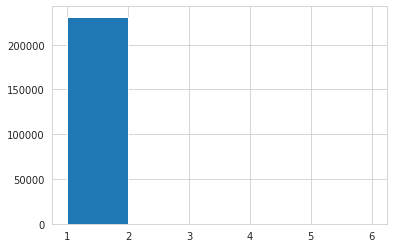

In [8]:
# filtrar incluyendo repetición de CsYear ScopusSourceID

# en lugar de mostrar solo las filas cuyo count sea mayor que 1 y  buscar las filas con el ScopusSourceID	 >1  y borrar las filas de menos Percentile
# aprovecho la función keep="last" para  eliminar todas las filas con un valor repetido, menos la ultima
# Establecemos keep=False para eliminar todas las filas que tengan el mismo valor de cualquier columna.

#primero tengo que ordenar por CsYear ScopusSourceID  y por Percentile ascendente
dfOrdered=df.sort_values(['CsYear','ScopusSourceID', 'Percentile'], ascending=True)
dfOrderedNoDup = dfOrdered.drop_duplicates(subset=['CsYear','ScopusSourceID'], keep="last")
# compruebo que ahora no hay ScopusSourceID repetidos
ContarSourceIdNoDup = dfOrderedNoDup.groupby(['CsYear','ScopusSourceID'], as_index=False).size()
plt.hist(ContarSourceIdNoDup ["size"], bins=[1,2,3,4,5,6])
# plt.hist(ContarSourceId2 ["size"], bins=6)

In [9]:
#compruebo que me he quedado la fila con mejor percentil
print ("DataFrame with duplicates:"), print (ContarSourceId, "\n") 
print ("DataFrame without duplicates:"), print (ContarSourceIdNoDup, "\n")

dfOrdered.groupby(['CsYear','ScopusSourceID'], as_index=False).mean()

DataFrame with duplicates:
        CsYear  ScopusSourceID  size
0         2011           12001     2
1         2011           12002     2
2         2011           12004     2
3         2011           12005     2
4         2011           12006     4
...        ...             ...   ...
231287    2020     21101041510     3
231288    2020     21101041511     4
231289    2020     21101041512     4
231290    2020     21101041552     2
231291    2020     21101041622     1

[231292 rows x 3 columns] 

DataFrame without duplicates:
        CsYear  ScopusSourceID  size
0         2011           12001     1
1         2011           12002     1
2         2011           12004     1
3         2011           12005     1
4         2011           12006     1
...        ...             ...   ...
231287    2020     21101041510     1
231288    2020     21101041511     1
231289    2020     21101041512     1
231290    2020     21101041552     1
231291    2020     21101041622     1

[231292 rows x 3 columns]

,CsYear,ScopusSourceID,CitationCount,ScholarlyOutput,ScopusASJCCode,Percentile,RANK,RankOutOf,Quartile
0,2011,12001,344.0,197.0,3003.50,28.500000,59.00,82.000000,3.0
1,2011,12002,87.0,64.0,2201.50,66.500000,32.50,349.000000,2.0
2,2011,12004,185.0,118.0,2970.50,52.500000,163.00,337.500000,2.5
3,2011,12005,1881.0,385.0,2970.50,88.000000,42.50,337.500000,1.0
4,2011,12006,1591.0,342.0,2808.00,92.000000,14.00,280.500000,1.0
...,...,...,...,...,...,...,...,...,...
231287,2020,21101041510,37.0,62.0,3049.00,15.666667,232.00,281.666667,4.0
231288,2020,21101041511,29.0,88.0,2856.25,23.250000,18.25,24.250000,3.5
231289,2020,21101041512,1.0,8.0,2721.00,6.000000,144.00,153.000000,4.0
231290,2020,21101041552,779.0,245.0,2827.00,79.000000,46.00,159.000000,1.5


In [10]:
dfOrderedNoDup.groupby(['CsYear','ScopusSourceID'], as_index=False).mean()

,CsYear,ScopusSourceID,CitationCount,ScholarlyOutput,ScopusASJCCode,Percentile,RANK,RankOutOf,Quartile
0,2011,12001,344.0,197.0,2802.0,29.0,38.0,53.0,3.0
1,2011,12002,87.0,64.0,1202.0,93.0,45.0,665.0,1.0
2,2011,12004,185.0,118.0,3203.0,57.0,99.0,233.0,2.0
3,2011,12005,1881.0,385.0,3203.0,92.0,18.0,233.0,1.0
4,2011,12006,1591.0,342.0,3304.0,96.0,25.0,787.0,1.0
...,...,...,...,...,...,...,...,...,...
231287,2020,21101041510,37.0,62.0,3203.0,21.0,224.0,283.0,4.0
231288,2020,21101041511,29.0,88.0,2913.0,32.0,18.0,26.0,3.0
231289,2020,21101041512,1.0,8.0,2715.0,12.0,120.0,136.0,4.0
231290,2020,21101041552,779.0,245.0,2919.0,89.0,3.0,24.0,1.0


In [13]:
# Cargar la lista de meritos de Scopus
# unas 1600 referencias descargadas como csv directametne de Scopus (el separador es ",")
!wget --output-document=PruebaScopus.cvs  https://gdocu.upv.es/share/proxy/alfresco-noauth/api/internal/shared/node/content/LXftpYMDTPK04kJZQUk9tQ
MeritosScopus= pd.read_csv('PruebaScopus.cvs',sep=',')
MeritosScopus

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,Page count,Cited by,DOI,Link,Affiliations,Authors with affiliations,Abstract,Author Keywords,Index Keywords,Molecular Sequence Numbers,Chemicals/CAS,Tradenames,Manufacturers,Funding Details,Funding Text 1,Funding Text 2,Funding Text 3,Funding Text 4,Funding Text 5,Funding Text 6,Funding Text 7,Funding Text 8,Funding Text 9,Funding Text 10,References,Correspondence Address,Editors,Sponsors,Publisher,Conference name,Conference date,Conference location,Conference code,ISSN,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Source,EID,Unnamed: 53,Unnamed: 54
0,"Watanabe M., Nakagami Y., Isshiki T., Kunugi M...",57220594236;57220583283;57206230687;5722059097...,Research on the TRM Kaizen Method for Governme...,2022,IEEE Transactions on Engineering Management,69,1,NaN,17,33,NaN,1.0,10.1109/TEM.2020.3032603,https://www.scopus.com/inward/record.uri?eid=2...,"Tohoku Bureau of Economy, Trade and Industry, ...","Watanabe, M., Tohoku Bureau of Economy, Trade ...",This article aims to introduce a case study of...,Decisions under risk and uncertainty; integrat...,Industrial research; Industrial technology; Mi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Reillon, V., (2017) European Technology Platfo...","Nakagami, Y.; Technology Strategy Center, Japa...",NaN,NaN,Institute of Electrical and Electronics Engine...,NaN,NaN,NaN,NaN,189391,NaN,IEEMA,NaN,English,IEEE Trans Eng Manage,Article,Final,Scopus,2-s2.0-85097443092,NaN,NaN
1,"Marques P.A., Carvalho A.M., Santos J.O.",53863724400;57393169800;57392564600;,Improving Operational and Sustainability Perfo...,2022,Sustainability (Switzerland),14,1,403,NaN,NaN,NaN,NaN,10.3390/su14010403,https://www.scopus.com/inward/record.uri?eid=2...,EIGeS—Research Centre in Industrial Engineerin...,"Marques, P.A., EIGeS—Research Centre in Indust...",This paper presents a real application of a le...,Food waste; Fresh products markets; Lean; Out-...,NaN,NaN,NaN,NaN,NaN,101007642 H2020-MSCA-RISE-2020,Funding: This research was funded by the HORIZ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Buck, R., Minvielle, A., A fresh take on food ...","Marques, P.A.; EIGeS—Research Centre in Indust...",NaN,NaN,MDPI,NaN,NaN,NaN,NaN,20711050,NaN,NaN,NaN,English,Sustainability,Article,Final,Scopus,2-s2.0-85122098155,NaN,NaN
2,"Hung Y.-H., Huang K.-C., Yang T.",35181495100;57214691096;7404656948;,A simulation study on CONWIP system design for...,2022,European Journal of Industrial Engineering,16,1,NaN,31,40,NaN,NaN,10.1504/EJIE.2022.119370,https://www.scopus.com/inward/record.uri?eid=2...,"National Cheng Kung University, Tainan, 701, T...","Hung, Y.-H., National Cheng Kung University, T...",The aim of the study was to demonstrate the ef...,Bike chain; Constant work in process; CONWIP; ...,Customer satisfaction; Manufacture; Bike chain...,NaN,NaN,NaN,NaN,"Ministry of Science and Technology, Taiwan, MO...",The authors thank the anonymous company for pr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Chakravorty, S.S., Atwater, J.B., Bottleneck m...","Yang, T.; National Cheng Kung UniversityTaiwan...",NaN,NaN,Inderscience Publishers,NaN,NaN,NaN,NaN,17515254,NaN,NaN,NaN,English,Eur. J. Ind. Eng.,Article,Final,Scopus,2-s2.0-85120777638,NaN,NaN
3,"Shtrikov A.B., Zemlyanaya E.V., Shtrikova D.B.",57218546460;57362098300;57209182415;,Application of Kaizen System in HR Management,2022,Lecture Notes in Networks and Systems,304,NaN,NaN,915,922,NaN,NaN,10.1007/978-3-030-83175-2_111,https://www.scopus.com/inward/record.uri?eid=2...,"Samara State University of Economics, Samara, ...","Shtrikov, A.B., Samara State University of Eco...",The article is devoted to consideration of suc...,Distant interview; Improvement; Kaizen; Loss; ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EkoStroyResurs: EkoStroyResurs today. https://...,"Shtrikov, A.B.; Samara State University of Eco..."

In [24]:
# Cargar la lisa de meritos de WOS
!wget --output-document=PruebaWos.xlsx  https://gdocu.upv.es/share/proxy/alfresco-noauth/api/internal/shared/node/content/lgpTBHRxTHGkyIcCAqRiKA

MeritosWos = pd.read_excel('PruebaWos.xlsx', engine='openpyxl')
MeritosWos


--2022-02-12 20:39:46--  https://gdocu.upv.es/share/proxy/alfresco-noauth/api/internal/shared/node/content/lgpTBHRxTHGkyIcCAqRiKA
Resolving gdocu.upv.es (gdocu.upv.es)... 158.42.4.31
Connecting to gdocu.upv.es (gdocu.upv.es)|158.42.4.31|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 627416 (613K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘PruebaWos.xlsx’

PruebaWos.xlsx      100%[===================>] 612.71K  1.00MB/s    in 0.6s    

2022-02-12 20:39:47 (1.00 MB/s) - ‘PruebaWos.xlsx’ saved [627416/627416]



,Publication Type,Authors,Book Authors,Group Authors,Book Group Authors,Researcher Ids,ORCIDs,Book Editors,Author - Arabic,Article Title,Article Title - SciELO,Article Title - SciELO.1,Article Title - Chinese,Article Title - Russian,Patent Number,Patent Assignee,Source Title - Arabic,Source Title,Source Title - Korean,Book Series Title,Book Series Subtitle,Volume,Issue,Special Issue,Meeting Abstract,Start Page,End Page,Article Number,DOI,Book DOI,Early Access Date,Supplement,Publication Date,Publication Year,Abstract,Abstract - Foreign,Abstract - English Transliteration,Abstract - Foreign.1,Abstract - Korean,Conference Title,Conference Date,Conference Sponsor,Conference Location,"Times Cited, WoS Core","Times Cited, CSCD","Times Cited, RSCI","Times Cited, ARCI","Times Cited, BCI","Times Cited, SCIELO","Times Cited, All Databases",180 Day Usage Count,Since 2013 Usage Count,ISSN,eISSN,ISBN,UT (Unique ID),Pubmed Id
0,J,"Watanabe, Masayoshi; Nakagami, Yuto; Isshiki, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Research on the TRM Kaizen Method for Governme...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IEEE TRANSACTIONS ON ENGINEERING MANAGEMENT,NaN,NaN,NaN,69,1,NaN,NaN,17,33,NaN,10.1109/TEM.2020.3032603,NaN,NaN,NaN,FEB 2022,2022,This article aims to introduce a case study of...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0.0,0,0,1,12,12,0018-9391,1558-0040,NaN,WOS:000711639900008,NaN
1,J,"Hung, Yu-Hsiu; Huang, Kuan-Cheng; Yang, Taho",NaN,NaN,NaN,NaN,NaN,NaN,NaN,A simulation study on CONWIP system design for...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EUROPEAN JOURNAL OF INDUSTRIAL ENGINEERING,NaN,NaN,NaN,16,1,NaN,NaN,31,40,NaN,10.1504/EJIE.2022.119370,NaN,NaN,NaN,2022,2022,The aim of the study was to demonstrate the ef...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0,0,0,0,0,0,1751-5254,1751-5262,NaN,WOS:000725116700002,NaN
2,J,"Marques, Pedro Alexandre; Carvalho, Andre M.; ...",NaN,NaN,NaN,"Carvalho, Andre M./E-4940-2019","Carvalho, Andre M./0000-0002-9460-7553",NaN,NaN,Improving Operational and Sustainability Perfo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUSTAINABILITY,NaN,NaN,NaN,14,1,NaN,NaN,NaN,NaN,403,10.3390/su14010403,NaN,NaN,NaN,JAN 2022,2022,This paper presents a real application of a le...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0,0,0,0,2,2,NaN,2071-1050,NaN,WOS:000741155100001,NaN
3,J,"Boukherroub, Tasseda; Ouellet, Lysane; Lemay, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Improving access to frontline psychosocial ser...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTERNATIONAL JOURNAL OF LEAN SIX SIGMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1108/IJLSS-08-2020-0134,NaN,DEC 2021,NaN,NaN,2021,Purpose This study aims to improve accessibili...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0,0,0,0,0,0,2040-4166,2040-4174,NaN,WOS:000733654300001,NaN
4,J,"Mui, Kong Siew; Muthuveloo, Rajendran; Chan, J...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antecedents of kaizen culture and its effect o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TQM JOURNAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1108/TQM-06-2021-0188,NaN,DEC 2021,NaN,NaN,2021,Purpose The purpose of this research is to exa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0,0,0,0,1,1,1754-2731,1754-274X,NaN,WOS:000731593700001,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,J,"WITTENBERG, G",NaN,NaN,NaN,NaN,NaN,NaN,NaN,KAIZEN - THE MANY WAYS OF GETTING BETTER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASSEMBLY AUTOMATION,NaN,NaN,NaN,14,4,NaN,NaN,12,17,NaN,10.1108/EUM0000000004213,NaN,NaN,NaN,1994,1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,0,0,0.0,0,1,22,0,14,0144-5154,NaN,NaN,WOS:A1994QA34400004,NaN
637,J,"UJIMOTO, KV",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"KAIZEN, TIME-BUDGETS AND ELDERCARE RESEARCH",NaN,NaN,NaN,NaN,NaN,NaN,NaN,SOCIAL INDICATORS RESEARCH,NaN,NaN,NaN,30,2-3,NaN,NaN,185,195,NaN,10.1007/BF01078727,NaN,NaN,NaN,NOV 1993,1993,Based on the kaizen principle of continuous im...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
# Añadir las columnas de WOS a la lista de meritos de Scopus

In [ ]:
#  ENLAZAR tabla de meritos con metrica de revista SCOPUS por ISSN (ojo que hay que mirar en dos columnas, si no está en PrintISSN	 busco en ElectISSN

In [ ]:
#  ENLAZAR tabla de meritos con metrica de revista WOS por ISSN (ojo que hay que mirar en dos columnas, si no está en PrintISSN	 busco en ElectISSN

#Referencias Phyton no usadas
set() para eliminar los duplicados en una lista en Python



In [ ]:

Queremos contar el número de códigos que utiliza un país. A continuación se enumeran las diferentes formas de contar los valores únicos.

df.groupby().nunique() Método

df.groupby().agg() Método

df.groupby().unique() Método


df = pd.DataFrame(data, columns=["code","Countries"])
result = df.groupby('Countries')['code'].nunique()
print(result)

Este método es útil cuando se quiere ver qué país está usando qué códigos.
result = df.groupby('Countries')["code"].unique()
print(result)


my_list.remove(2) # [5, 'DevCode', 1.2, 5]
En este ejemplo estamos removiendo el elemento 2, de la lista que tiene por nombre "my_list".

Aquí, pasamos Name como argumento subset al método drop_duplicates(). Las filas cuarta y quinta son eliminadas ya que tienen el mismo valor de la columna Name que la primera columna.
df_with_duplicates = pd.DataFrame({
    'Id': [302, 504, 708, 103, 303, 302],
    'Name': ['Watch', 'Camera', 'Phone', 'Shoes', 'Watch', 'Watch'],
    'Cost': ["300", "400", "350", "100", "300", "300"]
})

df_without_duplicates = df_with_duplicates.drop_duplicates(subset=['Name'])
print("DataFrame with duplicates:")
print(df_with_duplicates, "\n")
print("DataFrame without duplicates:")
print(df_without_duplicates, "\n")

Elimina todas las filas excepto la última que tiene el mismo valor de la columna Name.

Establecemos keep=False para eliminar todas las filas que tengan el mismo valor de cualquier columna.
df_without_duplicates = df_with_duplicates.drop_duplicates(
    subset=['Name'], keep="last")

print("DataFrame with duplicates:")
print(df_with_duplicates, "\n")
print("DataFrame without duplicates:")
print(df_without_duplicates, "\n")
df_without_duplicates = df_with_duplicates.drop_duplicates(
    subset=['Name'], keep=False)

In [ ]:

start_date = '2020-09-01'
end_date = '2021-03-24'
after_start_date = data['fecha'] >= start_date
before_end_date = data['fecha'] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = data.loc[between_two_dates]
# .loc 
filtered_dates

# and OR
data2 = data[(data['provincia_iso'] =='V') | (data['provincia_iso'] =='A')| (data['provincia_iso'] =='CS')]
data2 = data2[(data['sexo'] =='H') | (data['sexo'] =='M')]
data2

In [ ]:
df.groupby(['A','B']).B.agg('count').to_frame('c').reset_index()
